In [1]:
#Thư viện
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#chỉ số
INPUT_SIZE = [224,224]
BATCH = 16

In [3]:
#Tạo data để train
training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range = 0.2,
                                      )

training_data = training_datagen.flow_from_directory('./Train',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     class_mode = 'categorical'
                                                     )

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
label_order = training_data.class_indices
print(label_order)

{'Cars': 0, 'Mountains': 1, 'Selfies': 2, 'Trees': 3, 'Whatsapp_Screenshots': 4}


In [ ]:
#Tạo data để test
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = training_datagen.flow_from_directory('./Test',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     class_mode = 'categorical'
                                                     )

Found 128 images belonging to 5 classes.


Sử dụng VGG16 để train model

In [ ]:
#Sử dụng VGG16
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
vgg16 = VGG16(input_shape=INPUT_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
flatten = Flatten()(vgg16.output)
dense = Dense(units=256, activation='relu')(flatten)
dense_output = Dense(units=len(label_order), activation='softmax')(dense)

In [ ]:
model = Model(inputs=vgg16.input, outputs=dense_output)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(
  training_data,
  validation_data=test_data,
  epochs=10,
  steps_per_epoch=len(training_data),
  validation_steps=len(test_data)
)

Epoch 1/10
61/61 [==============================] - 110s 2s/step - loss: 1.4400 - accuracy: 0.8027 - val_loss: 0.2188 - val_accuracy: 0.9375
Epoch 2/10
61/61 [==============================] - 105s 2s/step - loss: 0.3514 - accuracy: 0.9148 - val_loss: 0.2082 - val_accuracy: 0.9609
Epoch 3/10
61/61 [==============================] - 99s 2s/step - loss: 0.2025 - accuracy: 0.9512 - val_loss: 0.1428 - val_accuracy: 0.9531
Epoch 4/10
61/61 [==============================] - 97s 2s/step - loss: 0.1281 - accuracy: 0.9605 - val_loss: 0.3120 - val_accuracy: 0.9453
Epoch 5/10
61/61 [==============================] - 96s 2s/step - loss: 0.0521 - accuracy: 0.9865 - val_loss: 0.8361 - val_accuracy: 0.8281
Epoch 6/10
61/61 [==============================] - 89s 1s/step - loss: 0.0707 - accuracy: 0.9834 - val_loss: 0.1557 - val_accuracy: 0.9531
Epoch 7/10
61/61 [==============================] - 92s 2s/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.7605 - val_accuracy: 0.8516
Epoch 8/10
61/61 [

In [ ]:
print(r.history)

{'loss': [1.4400135278701782, 0.35137268900871277, 0.20247285068035126, 0.128059521317482, 0.05205924063920975, 0.07065483927726746, 0.02268742024898529, 0.12664589285850525, 0.037374820560216904, 0.07599320262670517], 'accuracy': [0.8026999235153198, 0.9148494005203247, 0.951194167137146, 0.9605399966239929, 0.9865005016326904, 0.9833852648735046, 0.9937694668769836, 0.9730010628700256, 0.9937694668769836, 0.9823468327522278], 'val_loss': [0.21884126961231232, 0.20815245807170868, 0.14276094734668732, 0.3119877576828003, 0.8360652923583984, 0.15566982328891754, 0.7604771852493286, 0.2724762260913849, 0.2440868467092514, 0.18799333274364471], 'val_accuracy': [0.9375, 0.9609375, 0.953125, 0.9453125, 0.828125, 0.953125, 0.8515625, 0.9609375, 0.953125, 0.9609375]}


c:\Users\khuev\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


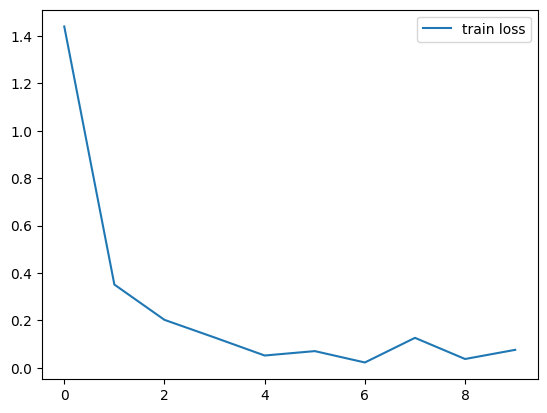

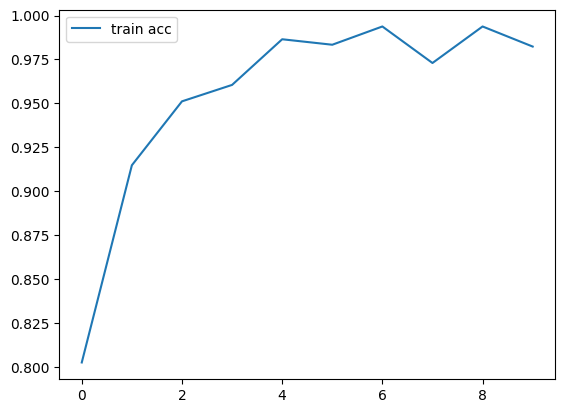

<Figure size 640x480 with 0 Axes>

In [ ]:
model.save('vgg16_model_gallery_image_classification.h5')

#loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

#accuracy
plt.plot(r.history['accuracy'], label='train acc')
# plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Phân loại ảnh vào các thư mục

In [ ]:
import os
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

In [ ]:
model = keras.models.load_model('vgg16_model_gallery_image_classification.h5')
model_class = [item for item in training_data.class_indices]
model_class

['Cars', 'Mountains', 'Selfies', 'Trees', 'Whatsapp_Screenshots']

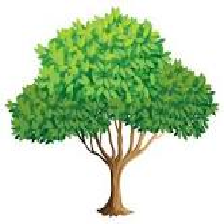

In [ ]:
load_image = image.load_img("./album/Trees-2.jpg", target_size=INPUT_SIZE)
load_image

In [ ]:
#đưa ra kết quả của ảnh
test_image = image.img_to_array(load_image)
test_image_below1 = test_image/255
test_image = np.expand_dims(test_image_below1, axis = 0)
result = model.predict(test_image)
result = result[0]
index = np.argmax(result)
if (result[index]>=0.9):
    if (model_class[index]=='Cars'):
        print('Ảnh xe ô tô')
    if (model_class[index]=='Mountains'):
        print('Ảnh núi')
    if (model_class[index]=='Selfies'):
        print('Ảnh chân dung')
    if (model_class[index]=='Trees'):
        print('Ảnh cây cối')
    if (model_class[index]=='Whatsapp_Screenshots'):
        print('Ảnh chụp màn hình')
else:
    print('Ảnh khác')
load_image

SyntaxError: expected ':' (2180419308.py, line 19)

In [ ]:
import shutil

folder_path = './album'
folder_result = './KQ'
if os.path.exists(folder_result):
    shutil.rmtree(folder_result)

for i in range(5):
        output_folder = os.path.join(folder_result, model_class[i])
        os.makedirs(output_folder)
os.makedirs('./KQ/Other')

for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        load_image = image.load_img(image_path, target_size=INPUT_SIZE)

        test_image = image.img_to_array(load_image)
        test_image_below1 = test_image/255
        test_image = np.expand_dims(test_image_below1, axis = 0)

        result = model.predict(test_image)
        result = result[0]

        index = np.argmax(result)

        if (result[index]>=0.9):
                tg = filename.split('-')
                if (tg[0]==model_class[index]):
                        print(filename+' => Chính xác')
                else:
                        print(filename+' => Không chính xác')
                load_image.save(os.path.join(folder_result, model_class[index],filename))
        else:
                load_image.save(os.path.join(folder_result, 'Other',filename))
                print(filename+' => Loại ảnh khác')



1/1 [==============================] - 0s 126ms/step
Cars-1.jpg => Chính xác
1/1 [==============================] - 0s 140ms/step
Cars-2.jpg => Chính xác
1/1 [==============================] - 0s 130ms/step
Cars-3.jpg => Chính xác
1/1 [==============================] - 0s 125ms/step
Cars-4.jpg => Chính xác
1/1 [==============================] - 0s 136ms/step
Cars-5.jpg => Chính xác
1/1 [==============================] - 0s 142ms/step
Mountains-1.jpg => Chính xác
1/1 [==============================] - 0s 135ms/step
Mountains-2.jpg => Chính xác
1/1 [==============================] - 0s 156ms/step
Mountains-3.jpg => Chính xác
1/1 [==============================] - 0s 119ms/step
Mountains-4.jpg => Chính xác
1/1 [==============================] - 0s 131ms/step
Mountains-5.jpg => Chính xác
1/1 [==============================] - 0s 131ms/step
Mountains-6.jpg => Chính xác
1/1 [==============================] - 0s 122ms/step
Mountains-7.jpg => Chính xác
1/1 [==============================] - 0s